In [1]:
from sklearn.model_selection import train_test_split
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib.image as mp
from astropy.io import fits
from astropy.wcs import wcs
from astropy import wcs
import pandas as pd
import numpy as np
import os  #操作系统接口模块
import re  #正则表达式
import sys
import cv2
import csv

dir="../test"    #目录路径
#获取当前目录下所有的文件路径
AllPath = []
for root,dirs,files in os.walk(dir):
    for file in files:
        #f.writelines(os.path.join(root,file)+"\n")
        if file != ".DS_Store":
            AllPath.append(os.path.join(root,file))
            
print(len(AllPath))
print(AllPath[0])

77
../test/fpC-000125-g2-0576.fit.gz


In [2]:
import numpy as np
from astropy import wcs
from astropy.io import fits
import sys

def load_wcs_from_file(filename):
    
    hdulist = fits.open(filename) #从FITS文件加载WCS信息
    print(hdulist[0].data)
    w = wcs.WCS(hdulist[0].header)
    print(w)
    w.wcs.print_contents()
    
    world = np.array([[0.815241,6.326027]], dtype=np.float64) 
    pixcrd2 = w.wcs_world2pix(world, 0)
    print(pixcrd2)
   
load_wcs_from_file(AllPath[0])

[[1233 1225 1239 ... 1237 1232 1224]
 [1239 1232 1223 ... 1247 1239 1229]
 [1240 1229 1235 ... 1229 1235 1252]
 ...
 [1253 1267 1242 ... 1251 1252 1237]
 [1227 1235 1252 ... 1236 1243 1240]
 [1240 1244 1251 ... 1251 1242 1236]]
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 75.07564865  -0.72296083  
CRPIX : 1024.5  744.5  
CD1_1 CD1_2  : 9.27172278982628e-09  0.000109890908531342  
CD2_1 CD2_2  : 0.000109986142578125  -3.2284946236503e-08  
NAXIS : 2048  1489
[[  221085.11178352 -1859000.93272504]]


STRIP   ='S          '         / Strip in the stripe being tracked.              [astropy.io.fits.card]
FLAVOR  ='science    '         / Flavor of this run                              [astropy.io.fits.card]
SYS_SCN ='mean       '         / System of the scan great circle (e.g., mean)    [astropy.io.fits.card]
OBJECT  ='100 S      '         / e.g., 'stripe 50.6 degrees, north strip'        [astropy.io.fits.card]
EXPTIME ='53.878784'           / Exposure time (seconds)                         [astropy.io.fits.card]
DAVERS  ='v12_6   '            / Version of DA software                          [astropy.io.fits.card]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '25/09/98' to '1998-09-25''. [astropy.wcs.wcs]


/home/zouzq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in ushort_scalars
/home/zouzq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in ushort_scalars
/home/zouzq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in ushort_scalars
/home/zouzq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in ushort_scalars


9
../test/fpC-000125-g2-0576.fit.gz 1675 265


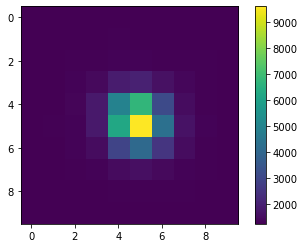

STRIP   ='N          '         / Strip in the stripe being tracked.              [astropy.io.fits.card]
OBJECT  ='100 N      '         / e.g., 'stripe 50.6 degrees, north strip'        [astropy.io.fits.card]
EXPTIME ='53.901312'           / Exposure time (seconds)                         [astropy.io.fits.card]
DAVERS  ='v12_3   '            / Version of DA software                          [astropy.io.fits.card]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '19/09/98' to '1998-09-19''. [astropy.wcs.wcs]


14
../test/fpC-000125-r3-0478.fit.gz 1151 196


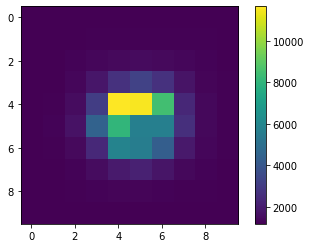

12
../test/fpC-000125-z3-0478.fit.gz 1149 209


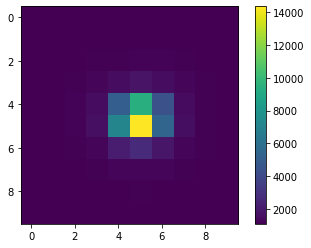

11
../test/fpC-000125-r2-0576.fit.gz 1675 247


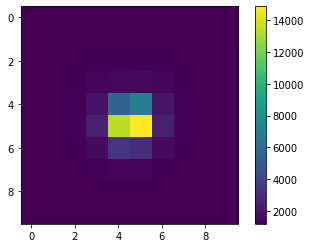

10
../test/fpC-000125-u3-0478.fit.gz 1152 205


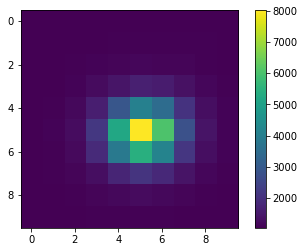

8
../test/fpC-000125-z2-0576.fit.gz 1674 260


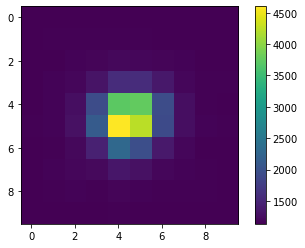

7
../test/fpC-000125-i2-0576.fit.gz 1674 252


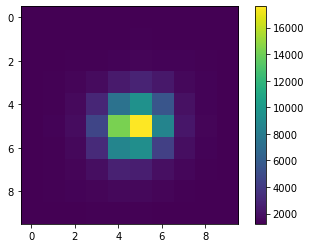

14
../test/fpC-000125-g3-0478.fit.gz 1151 214


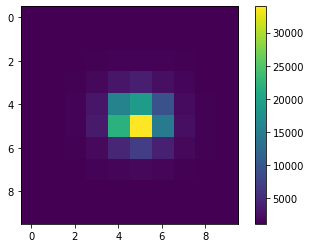

16
../test/fpC-000125-i3-0478.fit.gz 1149 201


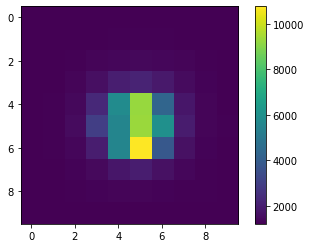

In [3]:
#加载数据
data = pd.read_csv('lamost_dr7_star_list.csv',header=None,names=["type","ra","dec","p_name"])
data = np.array(data)

#图片名格式化
def str_alter(str_origin, pos, str_add):
    str_origin = str_origin[12:26]
    str_origin = re.sub('[a-zA-Z]','',str_origin)
    str_list = list(str_origin)    # 字符串转list
    str_list.insert(pos, str_add)  # 在指定位置插入字符串
    str_out = ''.join(str_list)    # 空字符连接
    return  str_out

count = 1
for path in AllPath:
    
   #从FITS文件加载WCS信息
    hdulist = fits.open(path)
    image_data = hdulist[0].data
    #print(image_data)
    ima = image_data
#     ima = cv2.resize(ima,None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC) #缩放到10*10
#     cv2.imwrite('test1/'+str(count)+'.png',ima)
#     count = count+1
    #print(hdulist[0].data)
    w = wcs.WCS(hdulist[0].header)
    #print(w)
    #w.wcs.print_contents()
    
    
    path_2 = str_alter(path,9,'0')
    #print(path_2)
    #ima = cv2.resize(ima,None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC) #缩放到10*10
#     cv2.imwrite('test1/'+path[12:26]+'.png',ima)
    #count = count+1
    index = np.where(data[:,3] == path_2)
    n = index[0].shape
    n = int(np.array(n))
    for i in range(n):
        ra = data[index[0][i],1]
        dec = data[index[0][i],2]
        name = data[index[0][i],3]
        #print(index[0][i],ra,dec,name)    
        #print(path,i,x,y)
        world = np.array([[ra,dec]], dtype=np.float64) 
        pixcrd2 = w.all_world2pix(world, 0)
        x = int(pixcrd2[0][0])
        y = int(pixcrd2[0][1])
        
        if y<1489 and x<2048:
            temp = image_data[y][x]-np.min(image_data) #星体中心点和图像像素最低值差距
            if temp>1000:
                #temp =temp/3
                #print(path,image_data[y][x],np.min(image_data),temp)
                #test = image_data > (np.min(image_data)+100)
                #print(test)
                #print(index[0][i],ra,dec,name,pixcrd2)
                x1 = x
                while x1 >= 0:
                    if((image_data[y][x1+1] - image_data[y][x1]) < 200):
                        break
                    x1 = x1-1
                #print(x1,image_data[y][x1])
                x1 = x - x1
                
                x2 = x
                while x2 < 2048:
                    if((image_data[y][x2-1] - image_data[y][x2]) < 200):
                        break
                    x2 = x2-1
                #print(x2,image_data[y][x2])
                x2 = x-x2
                
                if x2>x1:
                    x1=x2
                
                y1 = y
                while y1 > 0:
                    if((image_data[y1+1][x] - image_data[y1][x]) < 200):
                        break
                    y1 = y1-1
                #print(y1,image_data[y1][x])
                y1=y-y1
                
                y2 = y
                while y2 < 1489:
                    if((image_data[y2-1][x] - image_data[y2][x]) < 200):
                        break
                    y2 = y2-1
                #print(y2,image_data[y2][x])
                y2=y-y2
                
                if y2>y1:
                    y1=y2
                    
                temp=x1
                if temp>y1:
                    temp=y1
                print(temp)
                
                print(path,x,y)
                
                
                 # 创建文件对象
                f = open('world2pix/'+path[12:26]+'.csv', 'a', encoding='utf-8', newline='') #保存亮点像素坐标
                # 基于文件对象构建 csv写入对象
                csv_writer = csv.writer(f)
                csv_writer.writerow([x,y])
                f.close()
                
                image = image_data[np.arange(y-temp,y+temp)] #按行取
                image = image.T[np.arange(x-temp,x+temp)]    #按列取
                image = cv2.resize(image,(10,10)) #缩放到10*10
                #print(image)
                plt.imshow(image)

                plt.colorbar()
                plt.show()
                mp.imsave('frame/'+path[12:26]+' ('+str(x)+','+str(y)+').png',image)
                np.savetxt('frame_data/'+path[12:26]+'.csv',image,delimiter=',',fmt='%s') #保存图片信息

test1/000094-u4-0168.png


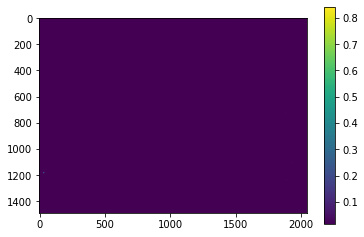

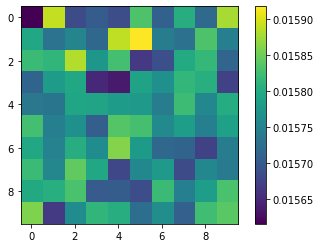

test1/000094-u6-0401.png


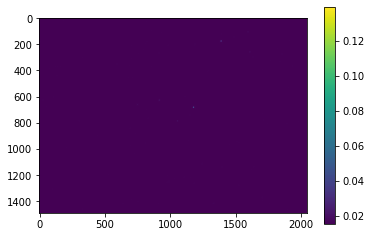

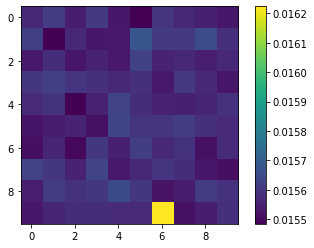

test1/000094-g5-0439.png


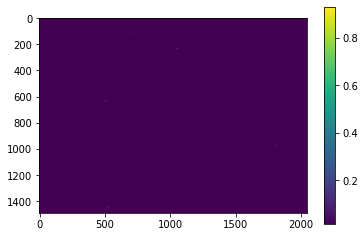

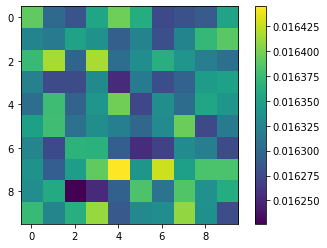

test1/000094-i6-0506.png


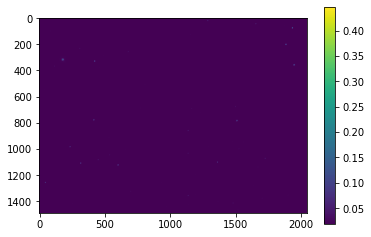

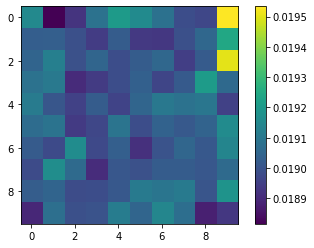

test1/000094-z5-0168.png


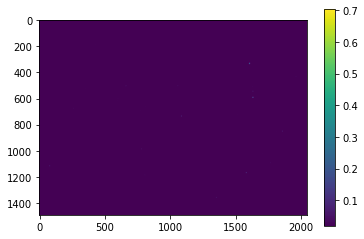

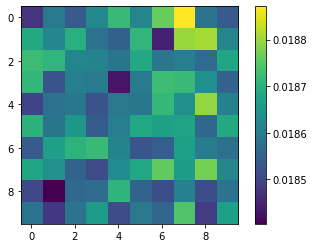

test1/000094-i4-0168.png


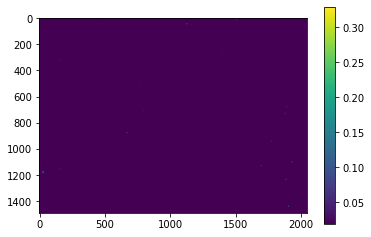

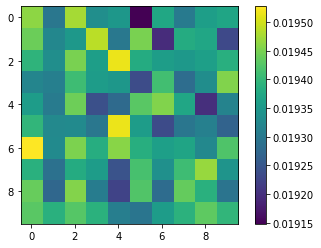

test1/000094-g4-0440.png


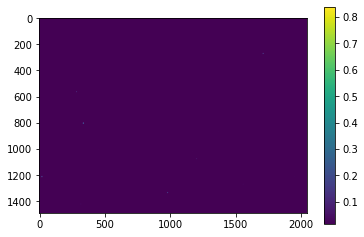

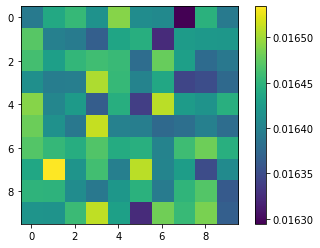

test1/000094-g5-0351.png


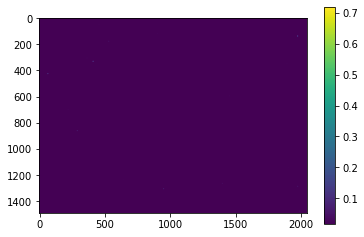

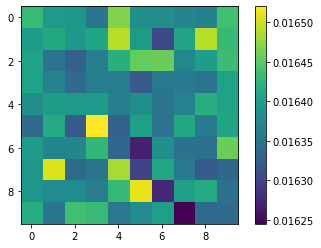

test1/000125-g4-0074.png


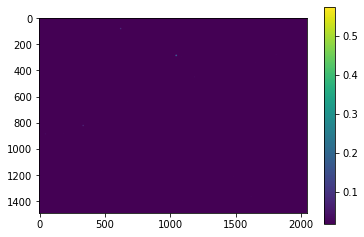

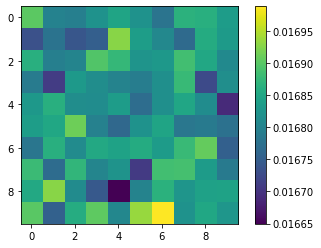

test1/000094-u6-0168.png


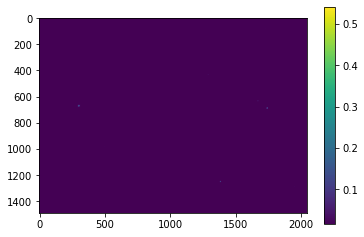

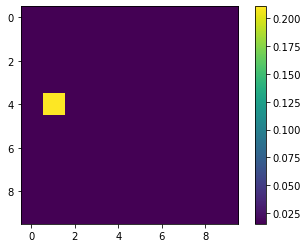

test1/000125-r2-0576.png


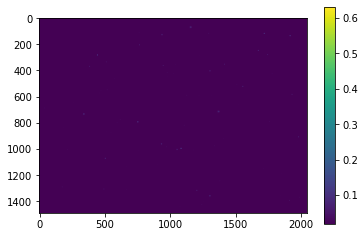

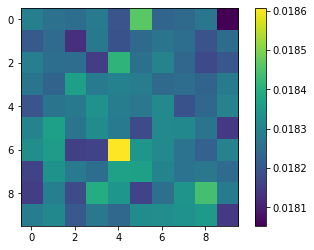

test1/000094-g6-0168.png


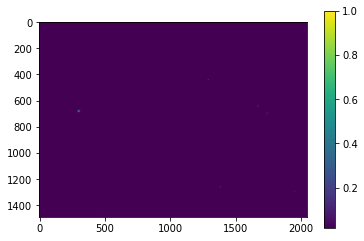

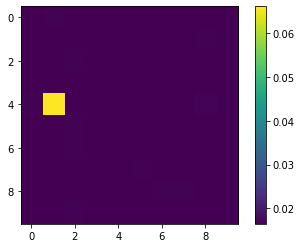

test1/000094-g5-0210.png


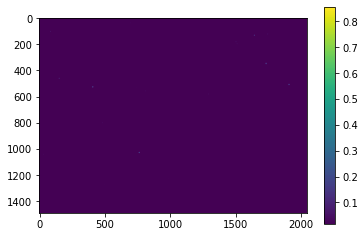

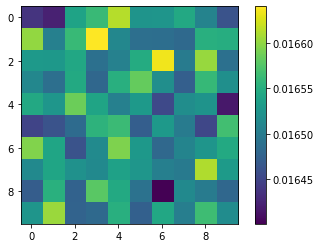

test1/000125-r4-0074.png


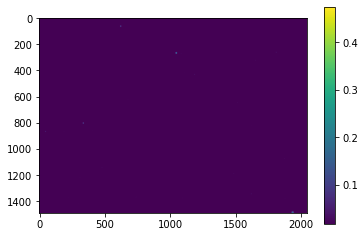

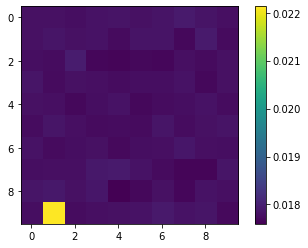

test1/000125-i4-0373.png


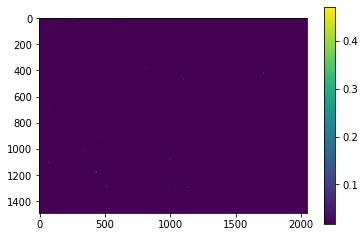

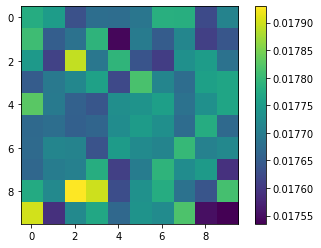

test1/000094-i5-0439.png


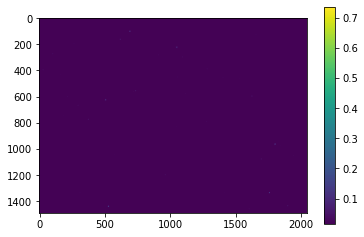

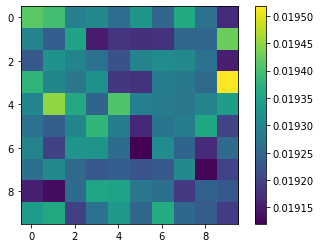

test1/000125-r4-0284.png


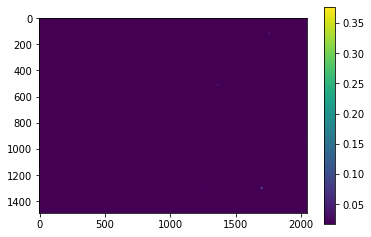

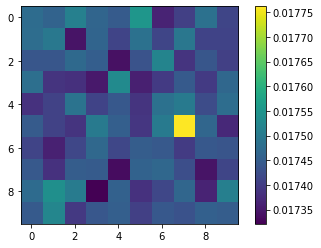

test1/000125-i4-0074.png


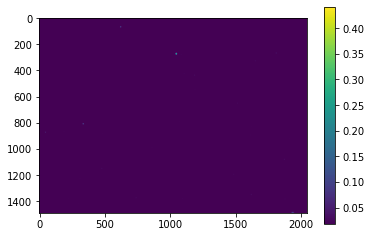

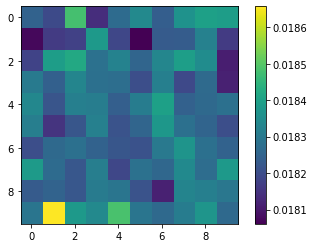

test1/000125-g4-0373.png


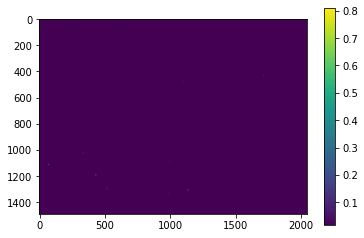

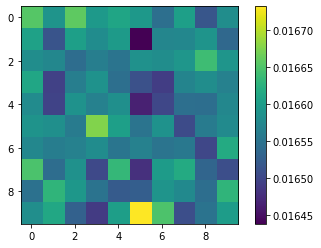

test1/000125-z2-0576.png


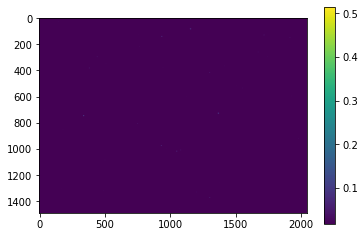

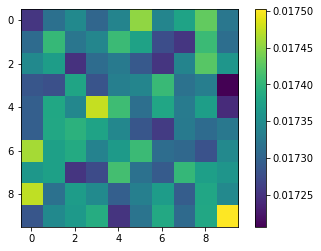

test1/000125-i3-0478.png


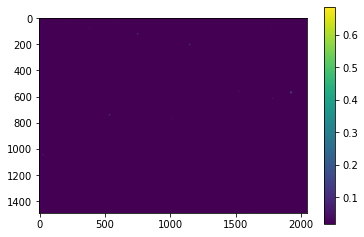

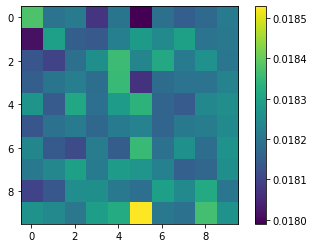

test1/000094-i4-0440.png


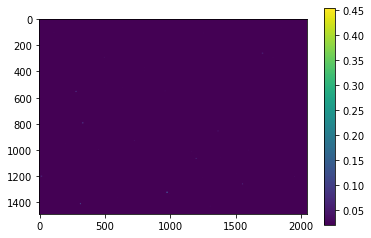

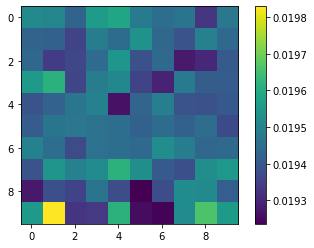

test1/000094-g6-0401.png


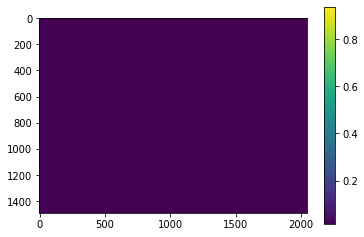

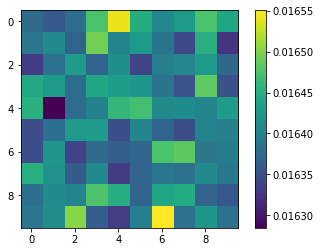

test1/000094-u5-0351.png


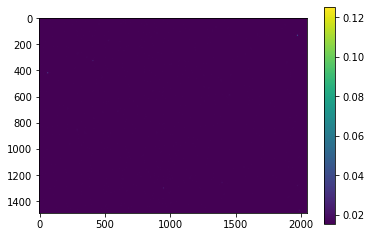

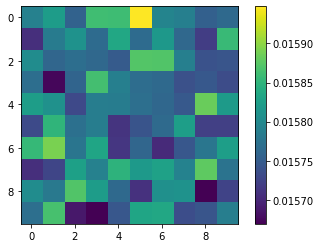

test1/000125-u4-0373.png


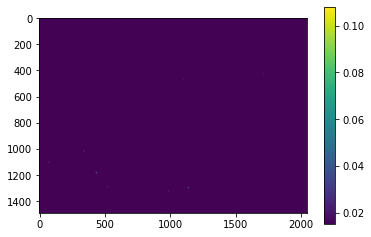

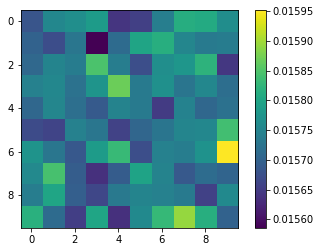

test1/000094-i6-0354.png


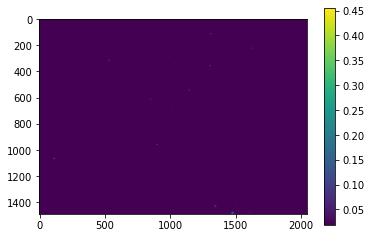

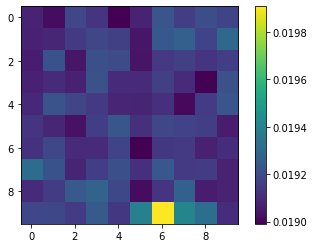

test1/000094-z4-0168.png


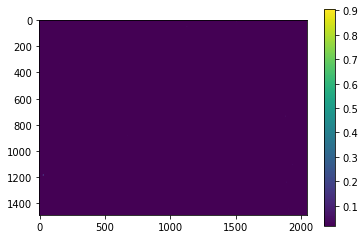

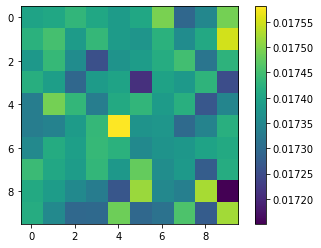

test1/000125-i2-0576.png


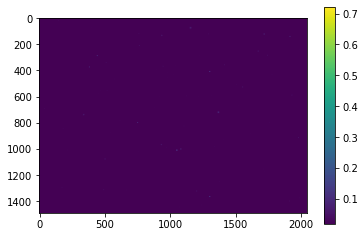

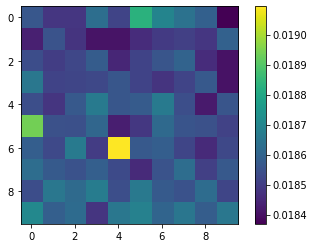

test1/000094-z5-0210.png


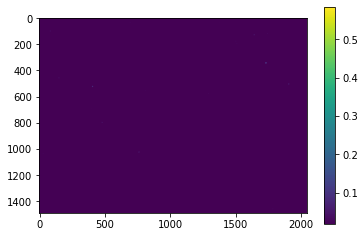

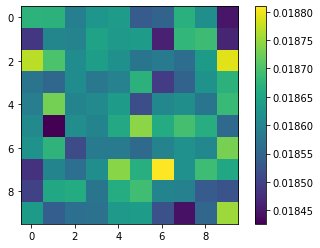

test1/000094-r6-0354.png


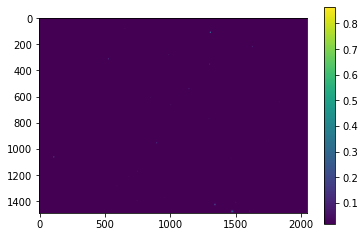

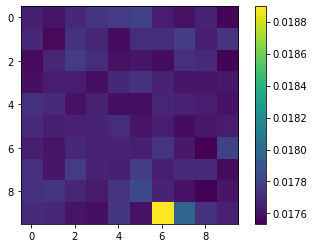

test1/000094-g6-0506.png


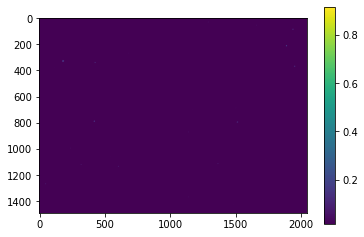

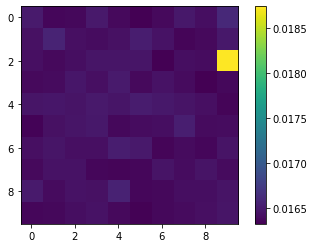

test1/000094-i5-0482.png


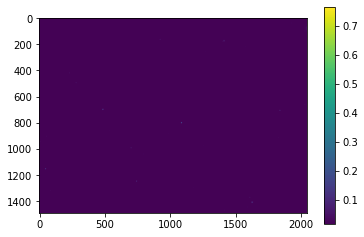

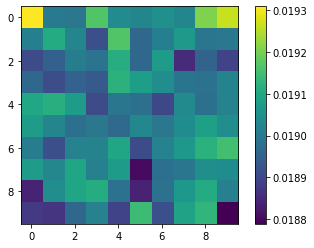

test1/000125-r4-0373.png


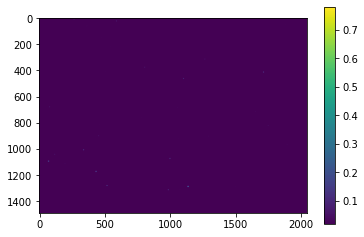

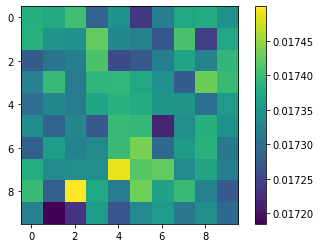

test1/000094-i6-0401.png


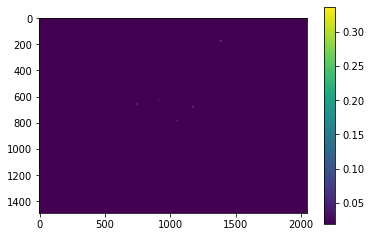

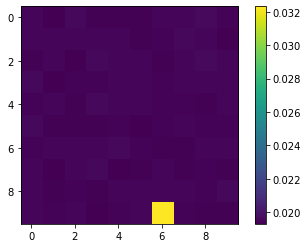

test1/000094-z5-0482.png


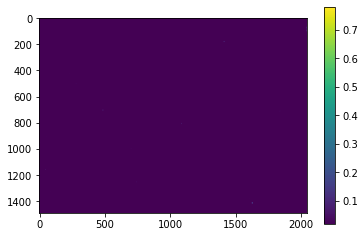

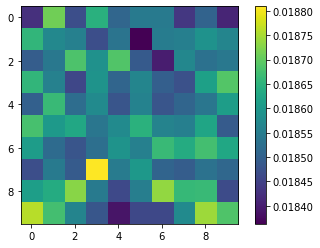

test1/000094-u5-0482.png


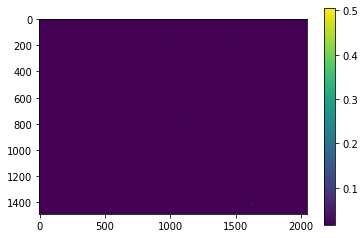

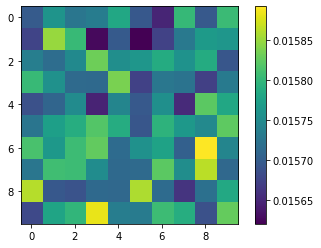

test1/000094-r5-0168.png


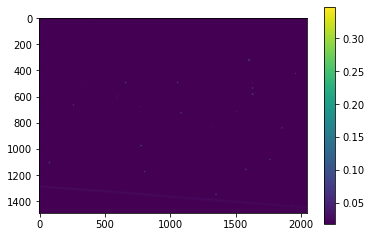

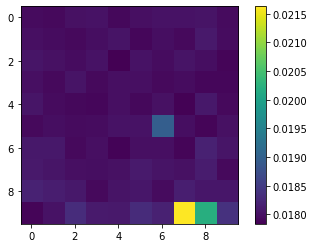

test1/000094-r4-0440.png


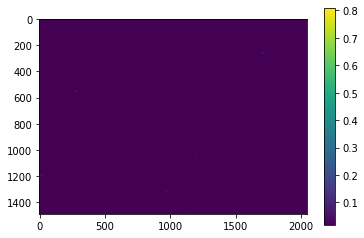

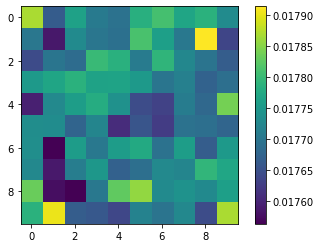

test1/000125-u4-0074.png


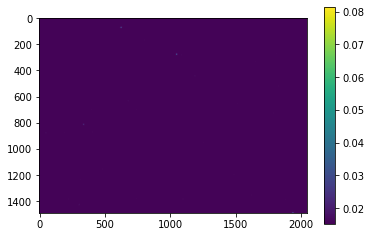

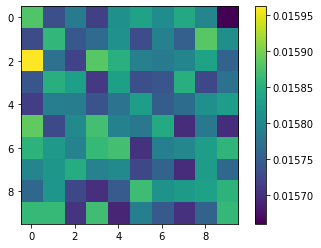

test1/000094-r5-0439.png


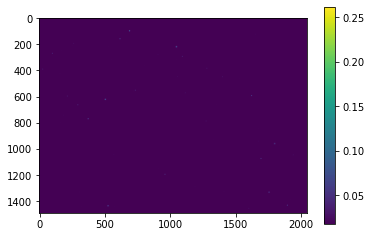

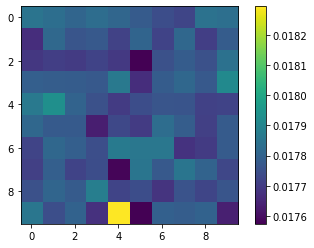

test1/000094-r5-0210.png


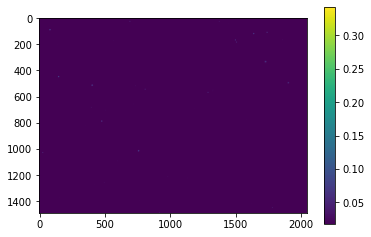

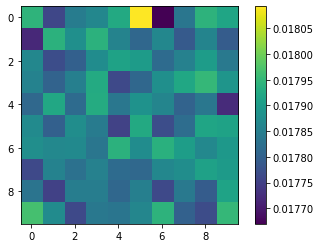

test1/000094-z6-0506.png


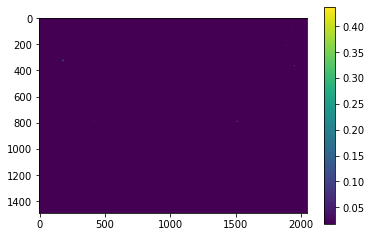

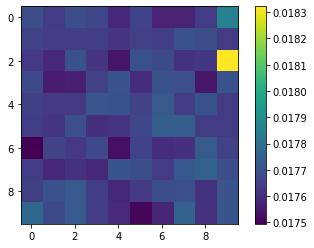

test1/000094-u5-0439.png


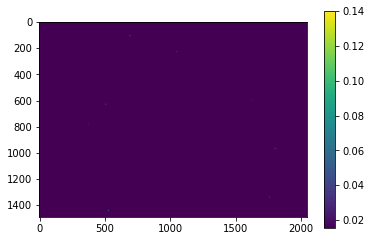

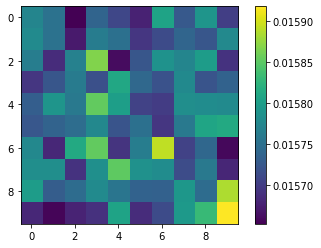

test1/000094-u5-0168.png


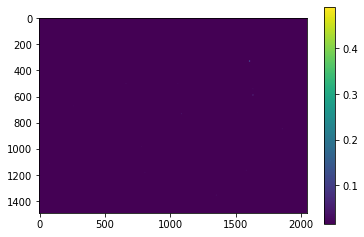

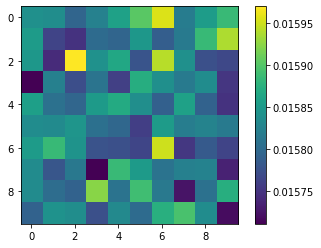

test1/000094-z5-0439.png


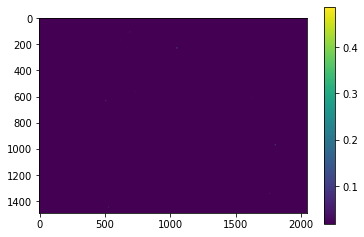

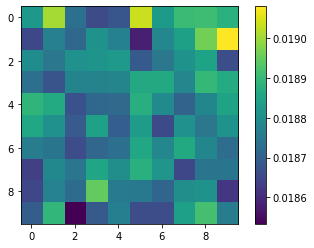

test1/000094-r5-0482.png


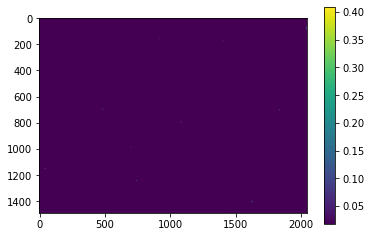

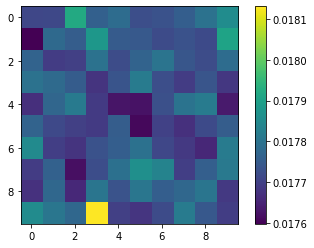

test1/000094-u4-0440.png


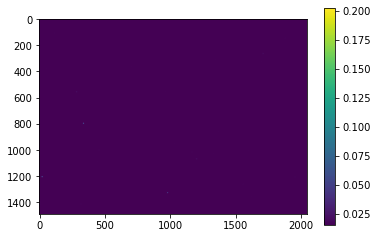

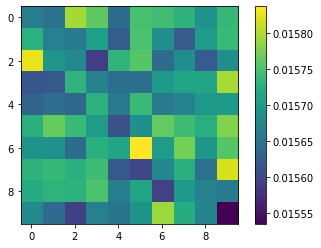

test1/000094-r6-0401.png


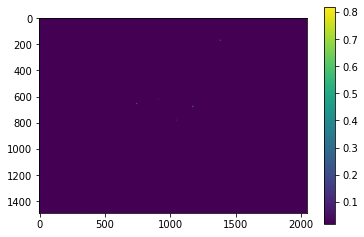

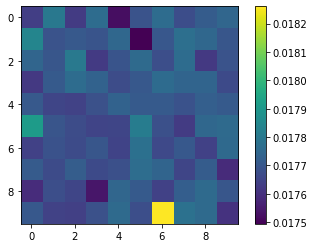

test1/000125-g4-0284.png


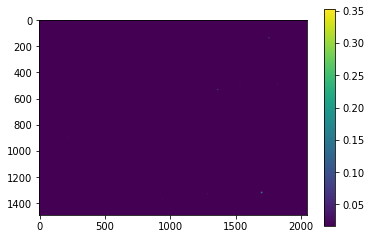

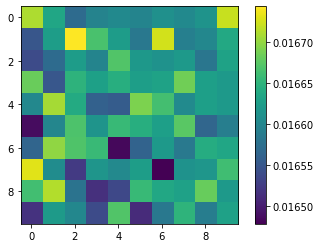

test1/000094-u6-0506.png


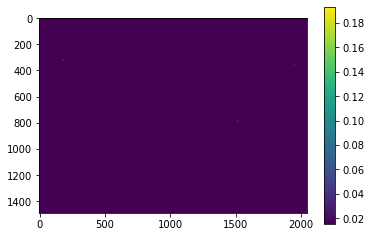

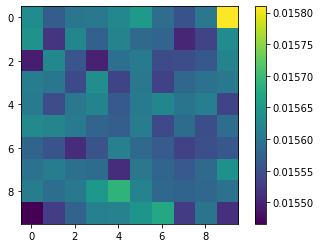

test1/000094-i6-0168.png


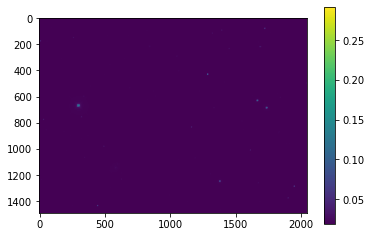

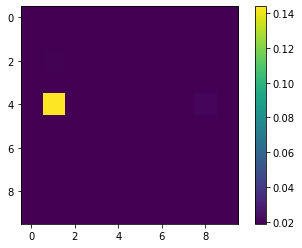

test1/000094-z6-0401.png


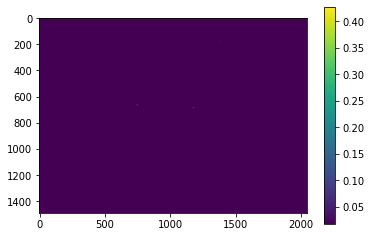

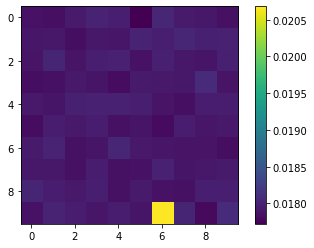

test1/000125-g3-0478.png


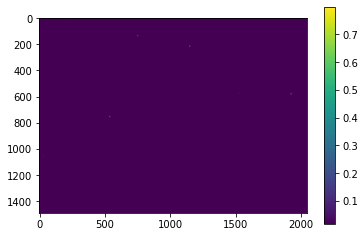

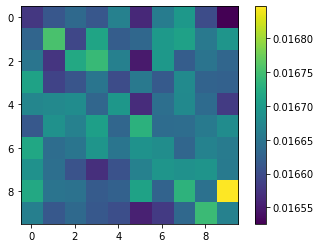

test1/000094-r6-0168.png


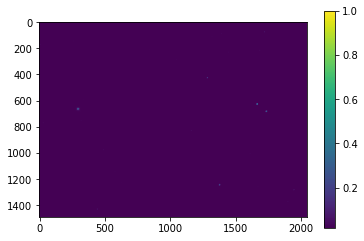

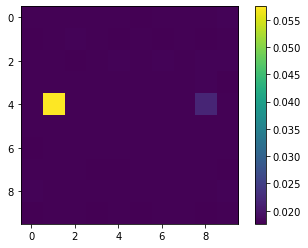

test1/000094-g5-0168.png


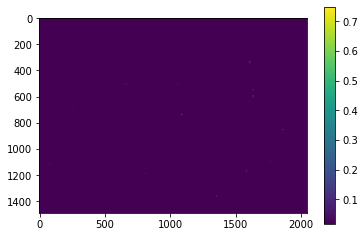

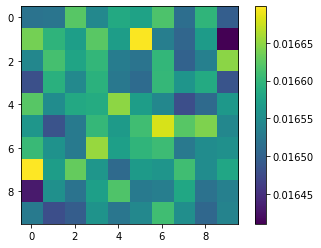

test1/000094-u5-0210.png


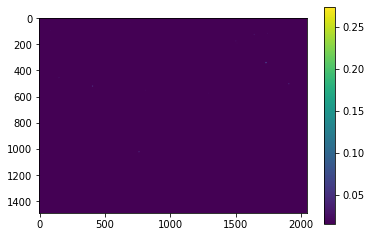

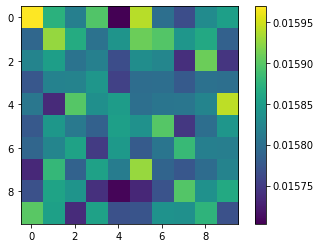

test1/000125-r3-0478.png


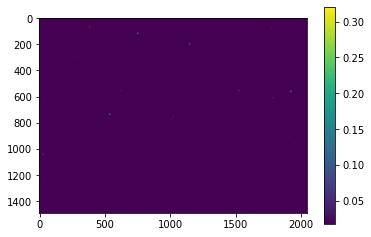

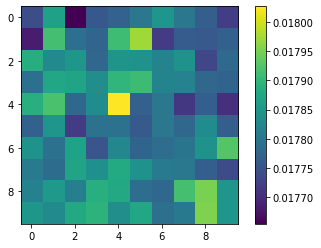

test1/000125-i4-0284.png


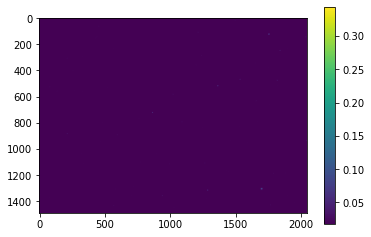

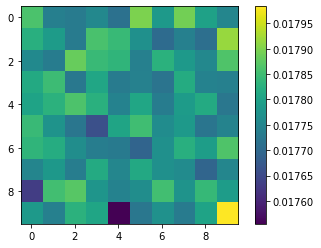

test1/000094-u6-0354.png


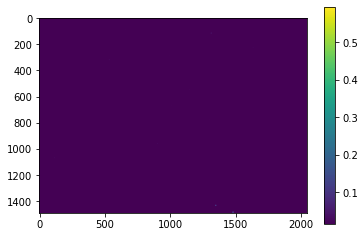

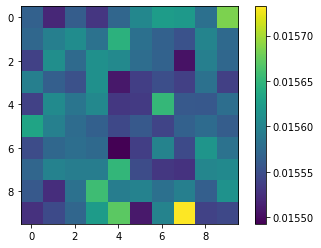

test1/000094-i5-0168.png


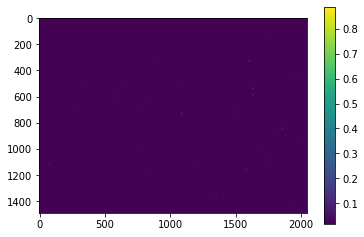

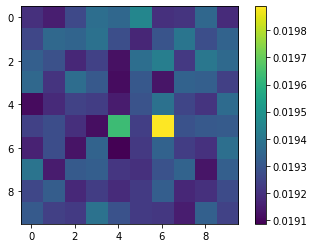

test1/000094-i5-0210.png


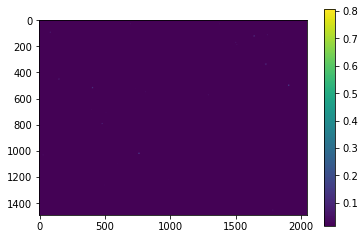

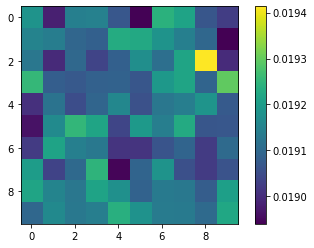

test1/000094-i5-0351.png


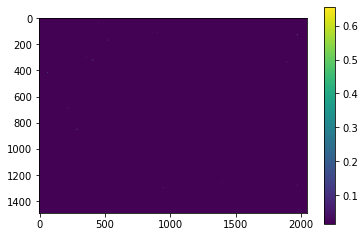

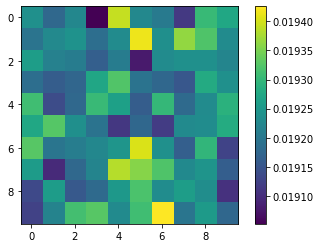

test1/000094-g5-0482.png


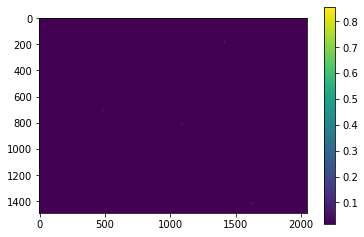

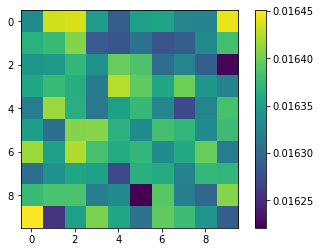

test1/000094-z6-0354.png


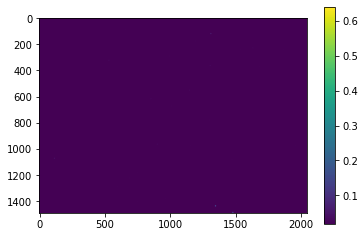

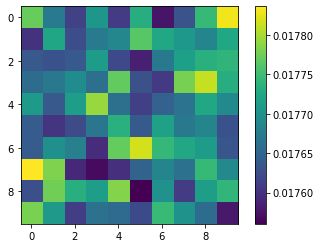

test1/000094-z5-0351.png


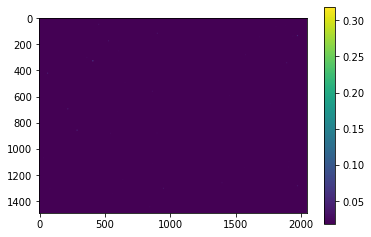

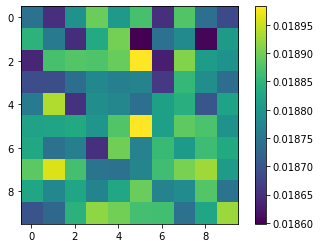

test1/000094-g4-0168.png


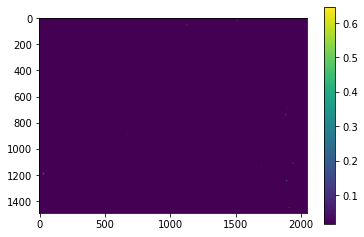

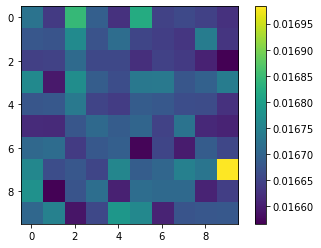

test1/000094-z6-0168.png


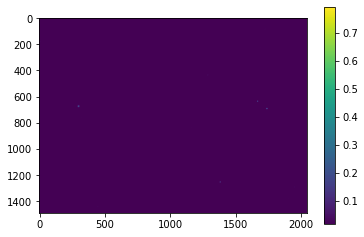

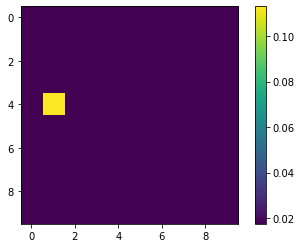

test1/000125-u2-0576.png


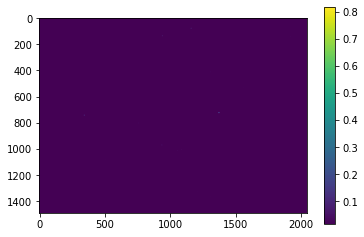

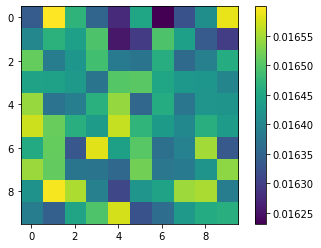

test1/000125-z3-0478.png


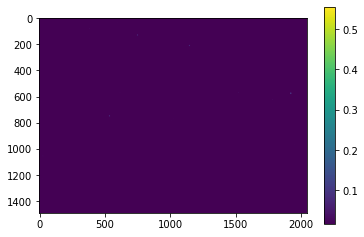

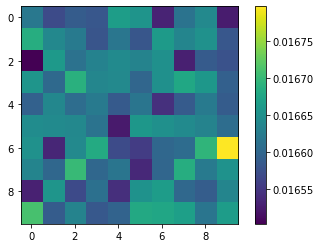

test1/000094-z4-0440.png


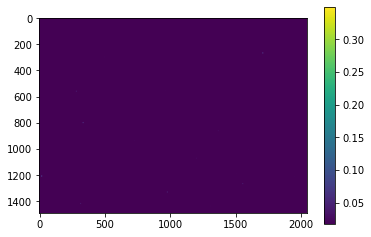

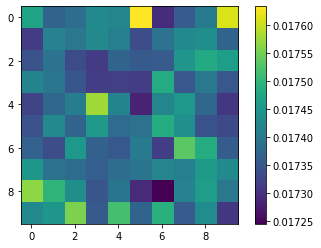

test1/000094-r6-0506.png


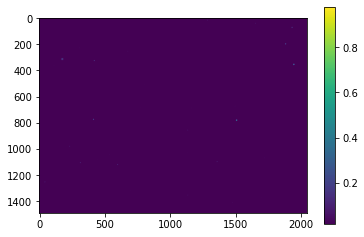

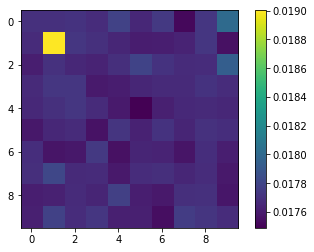

test1/000094-r5-0351.png


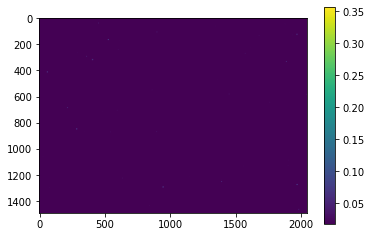

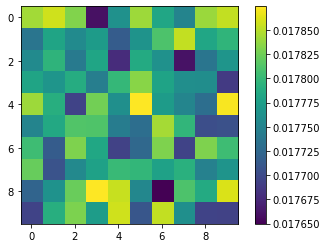

test1/000125-u4-0284.png


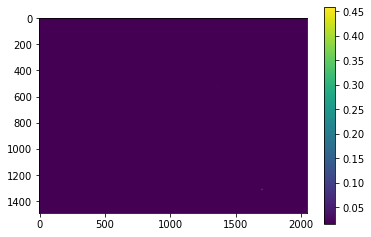

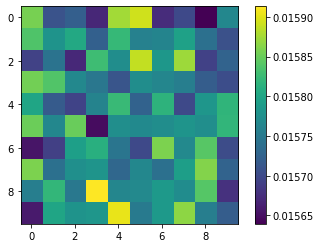

test1/000094-g6-0354.png


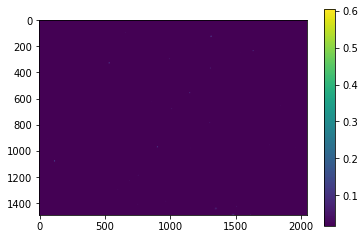

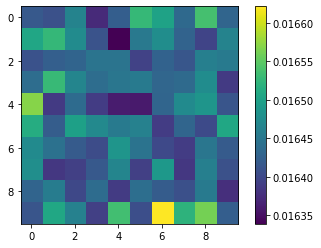

test1/000125-g2-0576.png


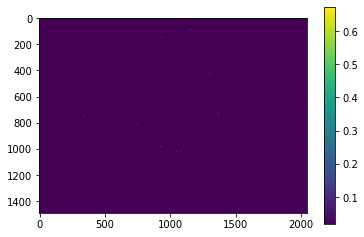

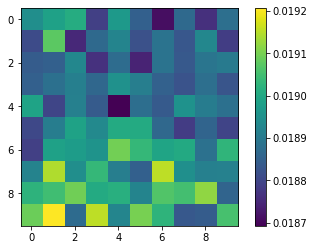

test1/000094-r4-0168.png


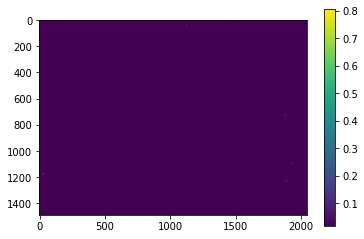

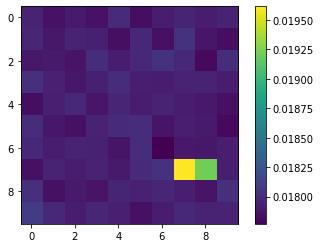

test1/000125-u3-0478.png


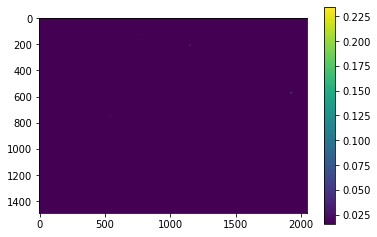

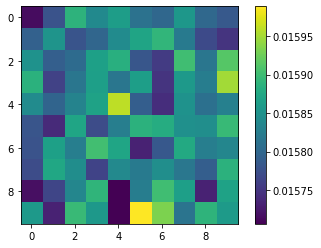

In [4]:
import cv2
import os
import glob
import matplotlib.image as mp

path = r'test1/*.png'
for i in glob.glob(path):
    im1 = mp.imread(i)
    print(i)
    plt.imshow(im1)
    plt.colorbar()
    plt.show()
    im2 = cv2.resize(im1,(10,10))
    plt.imshow(im2)
    plt.colorbar()  
    plt.show()
    mp.imsave('frame2/'+i[6:],im2)


frame2/000094-u4-0168.png


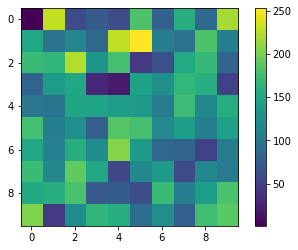

frame2/000094-u6-0401.png


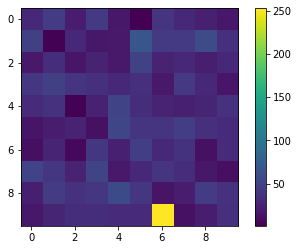

frame2/000094-g5-0439.png


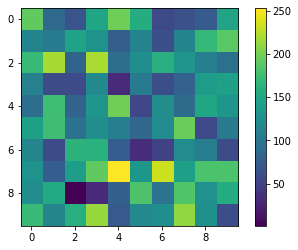

frame2/000094-i6-0506.png


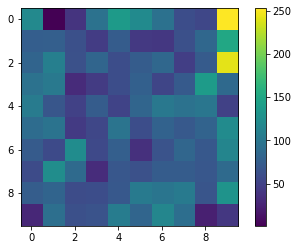

frame2/000094-z5-0168.png


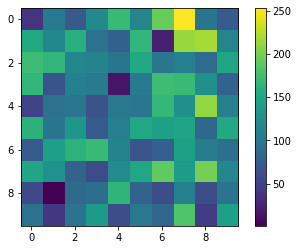

frame2/000094-i4-0168.png


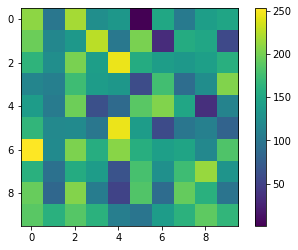

frame2/000094-g4-0440.png


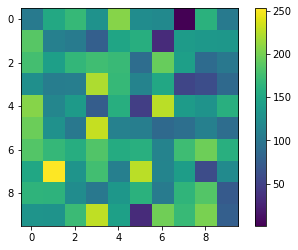

frame2/000094-g5-0351.png


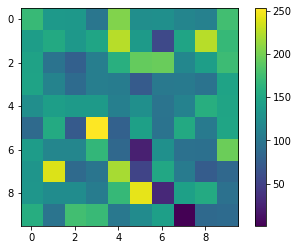

frame2/000125-g4-0074.png


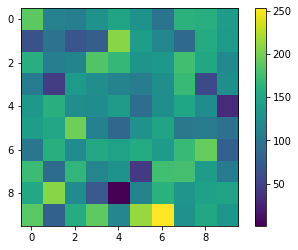

frame2/000094-u6-0168.png


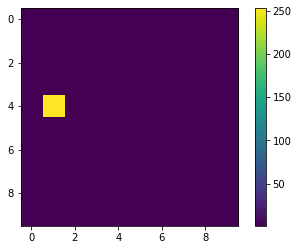

frame2/000125-r2-0576.png


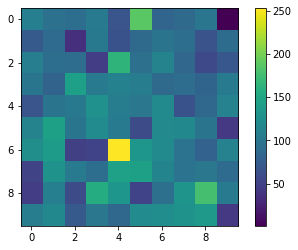

frame2/000094-g6-0168.png


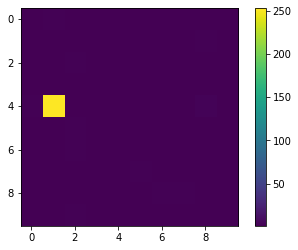

frame2/000094-g5-0210.png


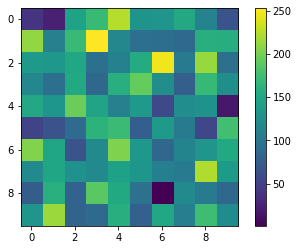

frame2/000125-r4-0074.png


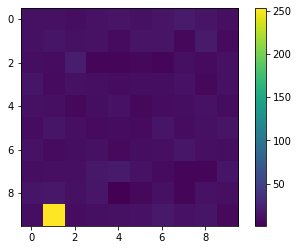

frame2/000125-i4-0373.png


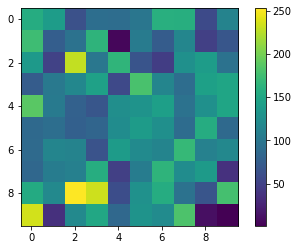

frame2/000094-i5-0439.png


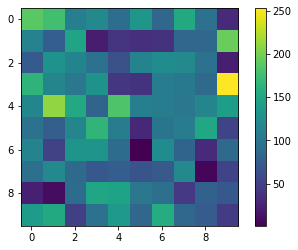

frame2/000125-r4-0284.png


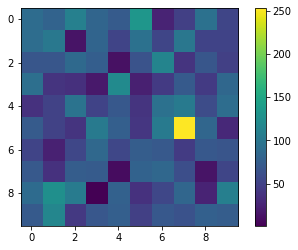

frame2/000125-i4-0074.png


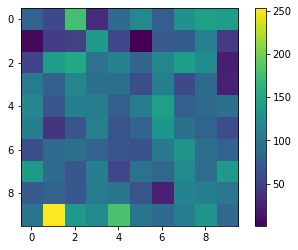

frame2/000125-g4-0373.png


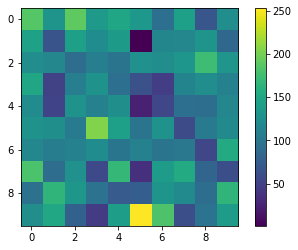

frame2/000125-z2-0576.png


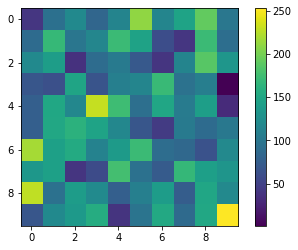

frame2/000125-i3-0478.png


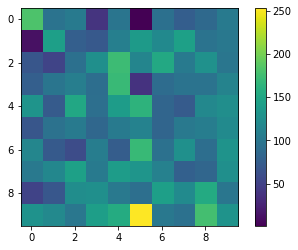

frame2/000094-i4-0440.png


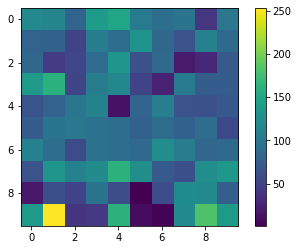

frame2/000094-g6-0401.png


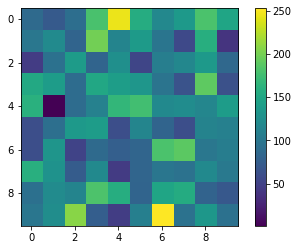

frame2/000094-u5-0351.png


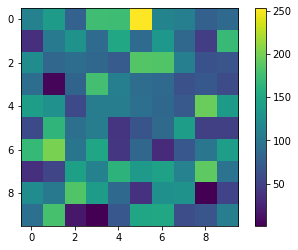

frame2/000125-u4-0373.png


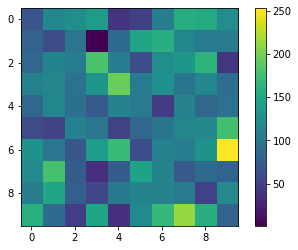

frame2/000094-i6-0354.png


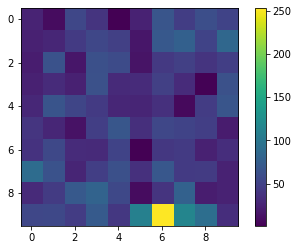

frame2/000094-z4-0168.png


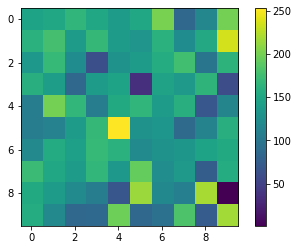

frame2/000125-i2-0576.png


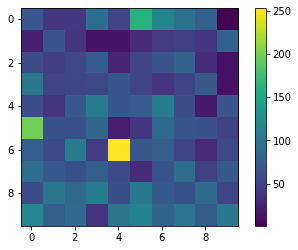

frame2/000094-z5-0210.png


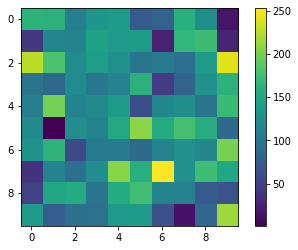

frame2/000094-r6-0354.png


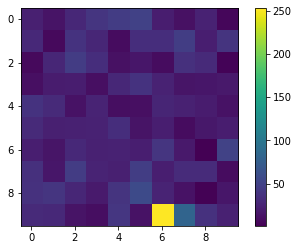

frame2/000094-g6-0506.png


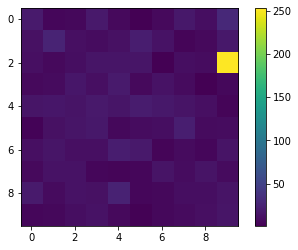

frame2/000094-i5-0482.png


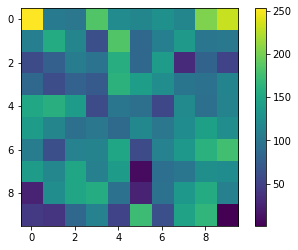

frame2/000125-r4-0373.png


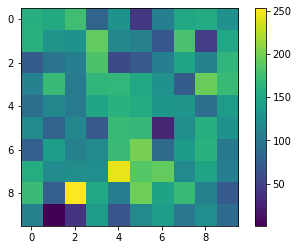

frame2/000094-i6-0401.png


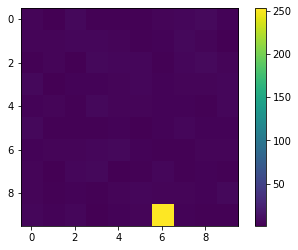

frame2/000094-z5-0482.png


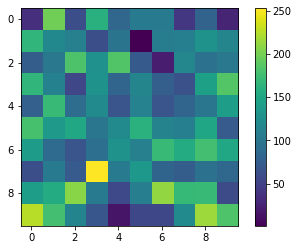

frame2/000094-u5-0482.png


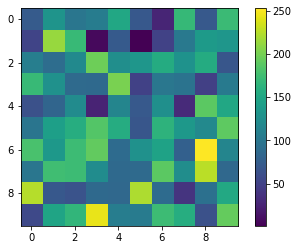

frame2/000094-r5-0168.png


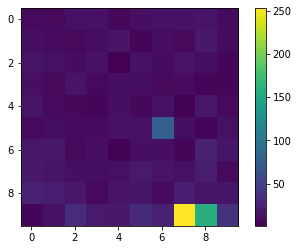

frame2/000094-r4-0440.png


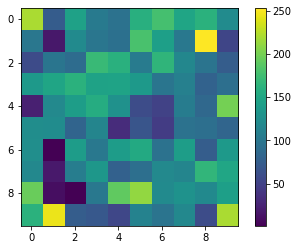

frame2/000125-u4-0074.png


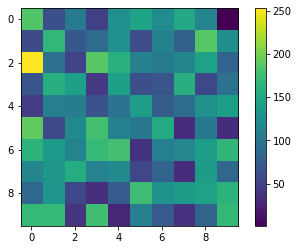

frame2/000094-r5-0439.png


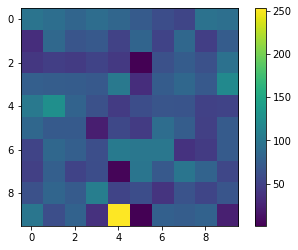

frame2/000094-r5-0210.png


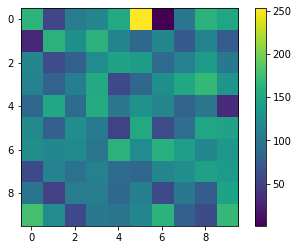

frame2/000094-z6-0506.png


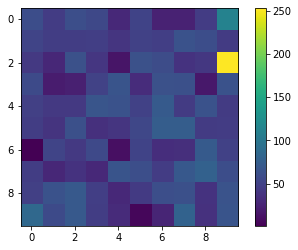

frame2/000094-u5-0439.png


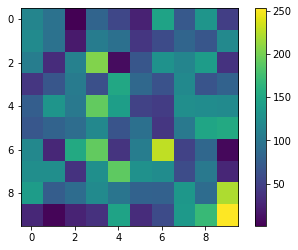

frame2/000094-u5-0168.png


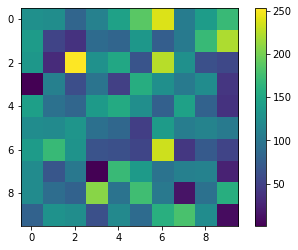

frame2/000094-z5-0439.png


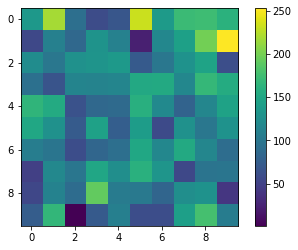

frame2/000094-r5-0482.png


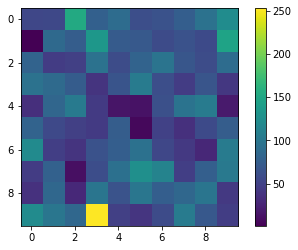

frame2/000094-u4-0440.png


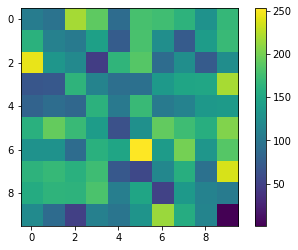

frame2/000094-r6-0401.png


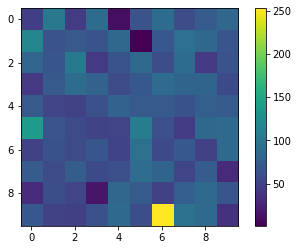

frame2/000125-g4-0284.png


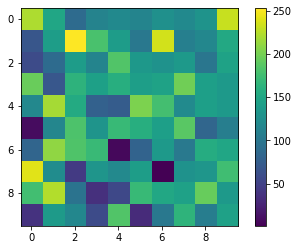

frame2/000094-u6-0506.png


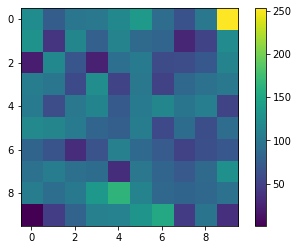

frame2/000094-i6-0168.png


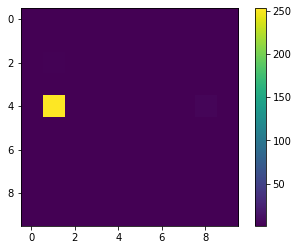

frame2/000094-z6-0401.png


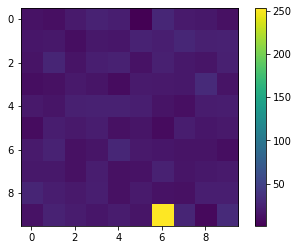

frame2/000125-g3-0478.png


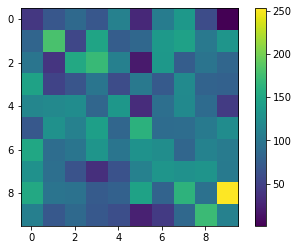

frame2/000094-r6-0168.png


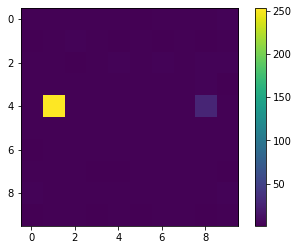

frame2/000094-g5-0168.png


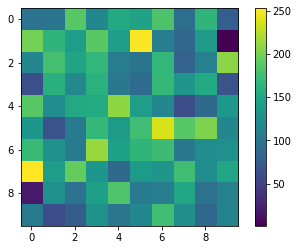

frame2/000094-u5-0210.png


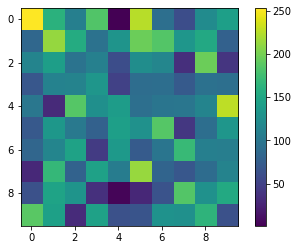

frame2/000125-r3-0478.png


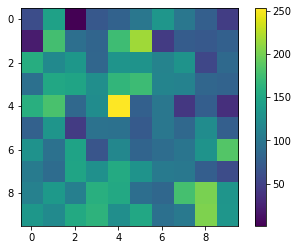

frame2/000125-i4-0284.png


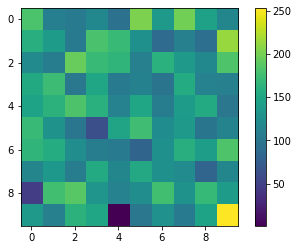

frame2/000094-u6-0354.png


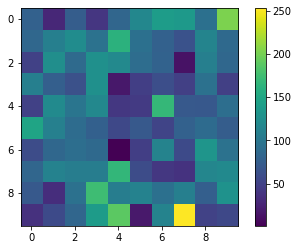

frame2/000094-i5-0168.png


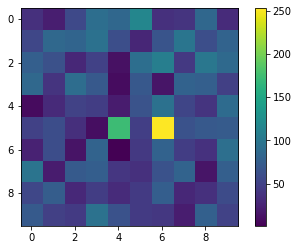

frame2/000094-i5-0210.png


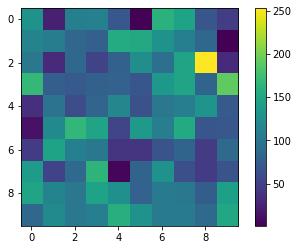

frame2/000094-i5-0351.png


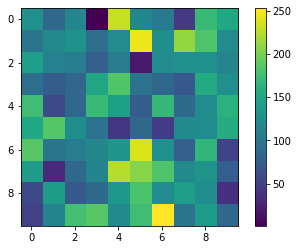

frame2/000094-g5-0482.png


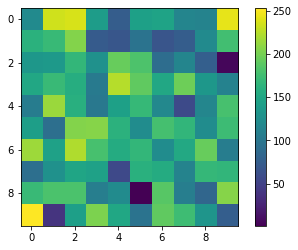

frame2/000094-z6-0354.png


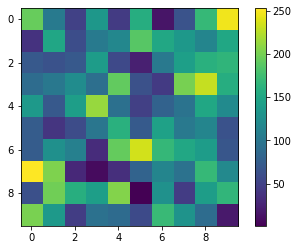

frame2/000094-z5-0351.png


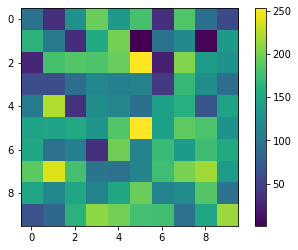

frame2/000094-g4-0168.png


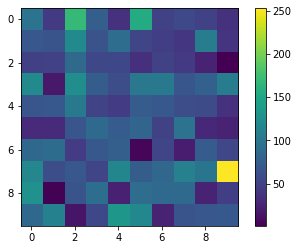

frame2/000094-z6-0168.png


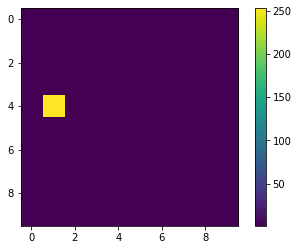

frame2/000125-u2-0576.png


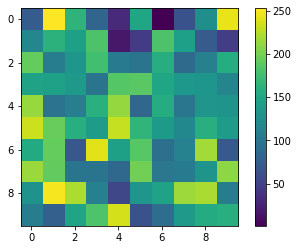

frame2/000125-z3-0478.png


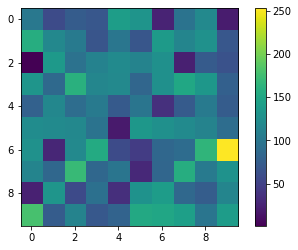

frame2/000094-z4-0440.png


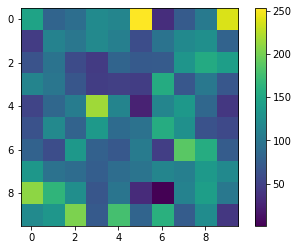

frame2/000094-r6-0506.png


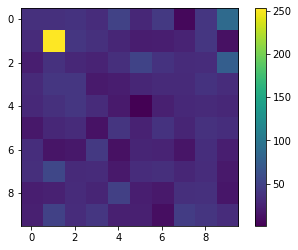

frame2/000094-r5-0351.png


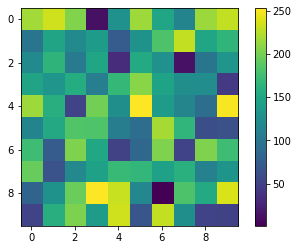

frame2/000125-u4-0284.png


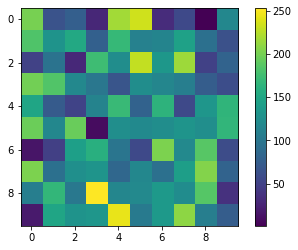

frame2/000094-g6-0354.png


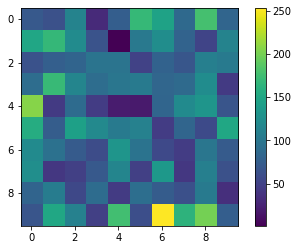

frame2/000125-g2-0576.png


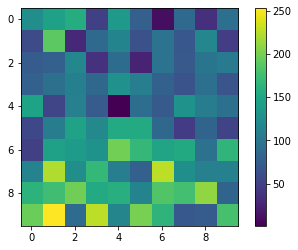

frame2/000094-r4-0168.png


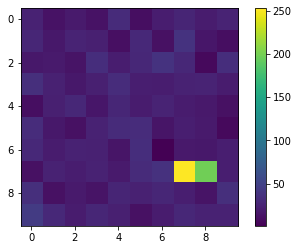

frame2/000125-u3-0478.png


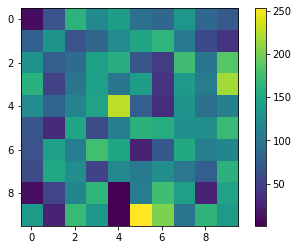

In [5]:
from PIL import Image

path = r'frame2/*.png'
for i in glob.glob(path):
    img = Image.open(i)
    # 将一个4通道转化为rgb三通道
    img = img.convert("RGB")
    print(i)
    plt.imshow(img)
    plt.colorbar()
    plt.show()
    save_path = 'frame/'
    img.save(save_path + i[6:23] + '.jpg')

In [6]:
img_BGR = cv2.imread('frame2/000125-i2-0576 (1674,252).png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from PIL import Image
import cv2
import os
import glob
import matplotlib.image as mp

path = r'test1/*.png'
for i in glob.glob(path):
    im1 = cv2.imread(i,1)
    cv2.imshow('im1',im1)
    cv2.waitKey(0)
   